In [1]:
## importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\Data-Science-ML-Capstone-Projects-master\\Data-Science-ML-Capstone-Projects-master\\baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Shape of the dataset
df.shape

(30, 17)

In [5]:
## complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
## Dataset decription
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
# Replacing the zero value with mean value  in CG colmns which has zero minimum value 
df['CG'] = df['CG'].replace(0,df['CG'].mean())

In [8]:
## Checking the null values in the dataset
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
# Replacing the columns name ito proper format for better understanding
df = df.rename(columns = {'W':'Wins','R':'Runs','AB':'At_bats','H':'Hits',
                         '2B':'Doubles','3B':'Triples','HR':'Home_run','BB':'Walks','SO':'Strike_Outs',
                         'SB':'Stolen_Bases','RA':'Runs_Allowed','ER':'Earned_Runs','ERA':'Earned_Average_Run',
                         'CG':'Complete_Games','SH':'Shouts','SV':'Saves','E':'Error'})

In [10]:
df.describe()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.813333,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.503845,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,2.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.466667,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


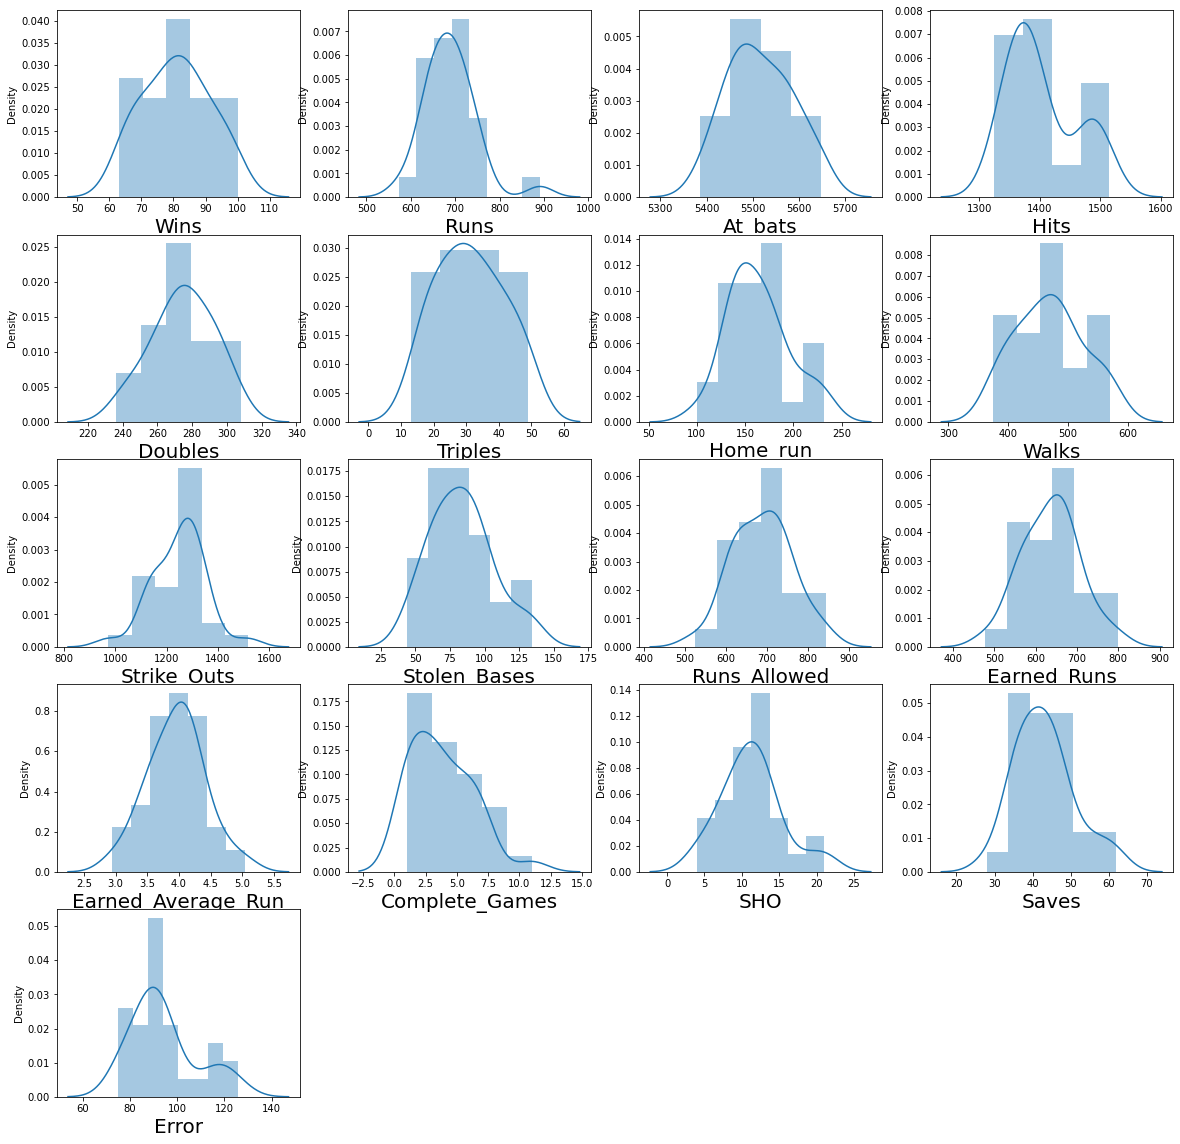

In [11]:
# plotting the distribution plot for checking the dataset Normal Distribution
plt.figure(figsize = (20,20))
pl = 1

for column in df:
    if pl<=17:
        ax = plt.subplot(5,4,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

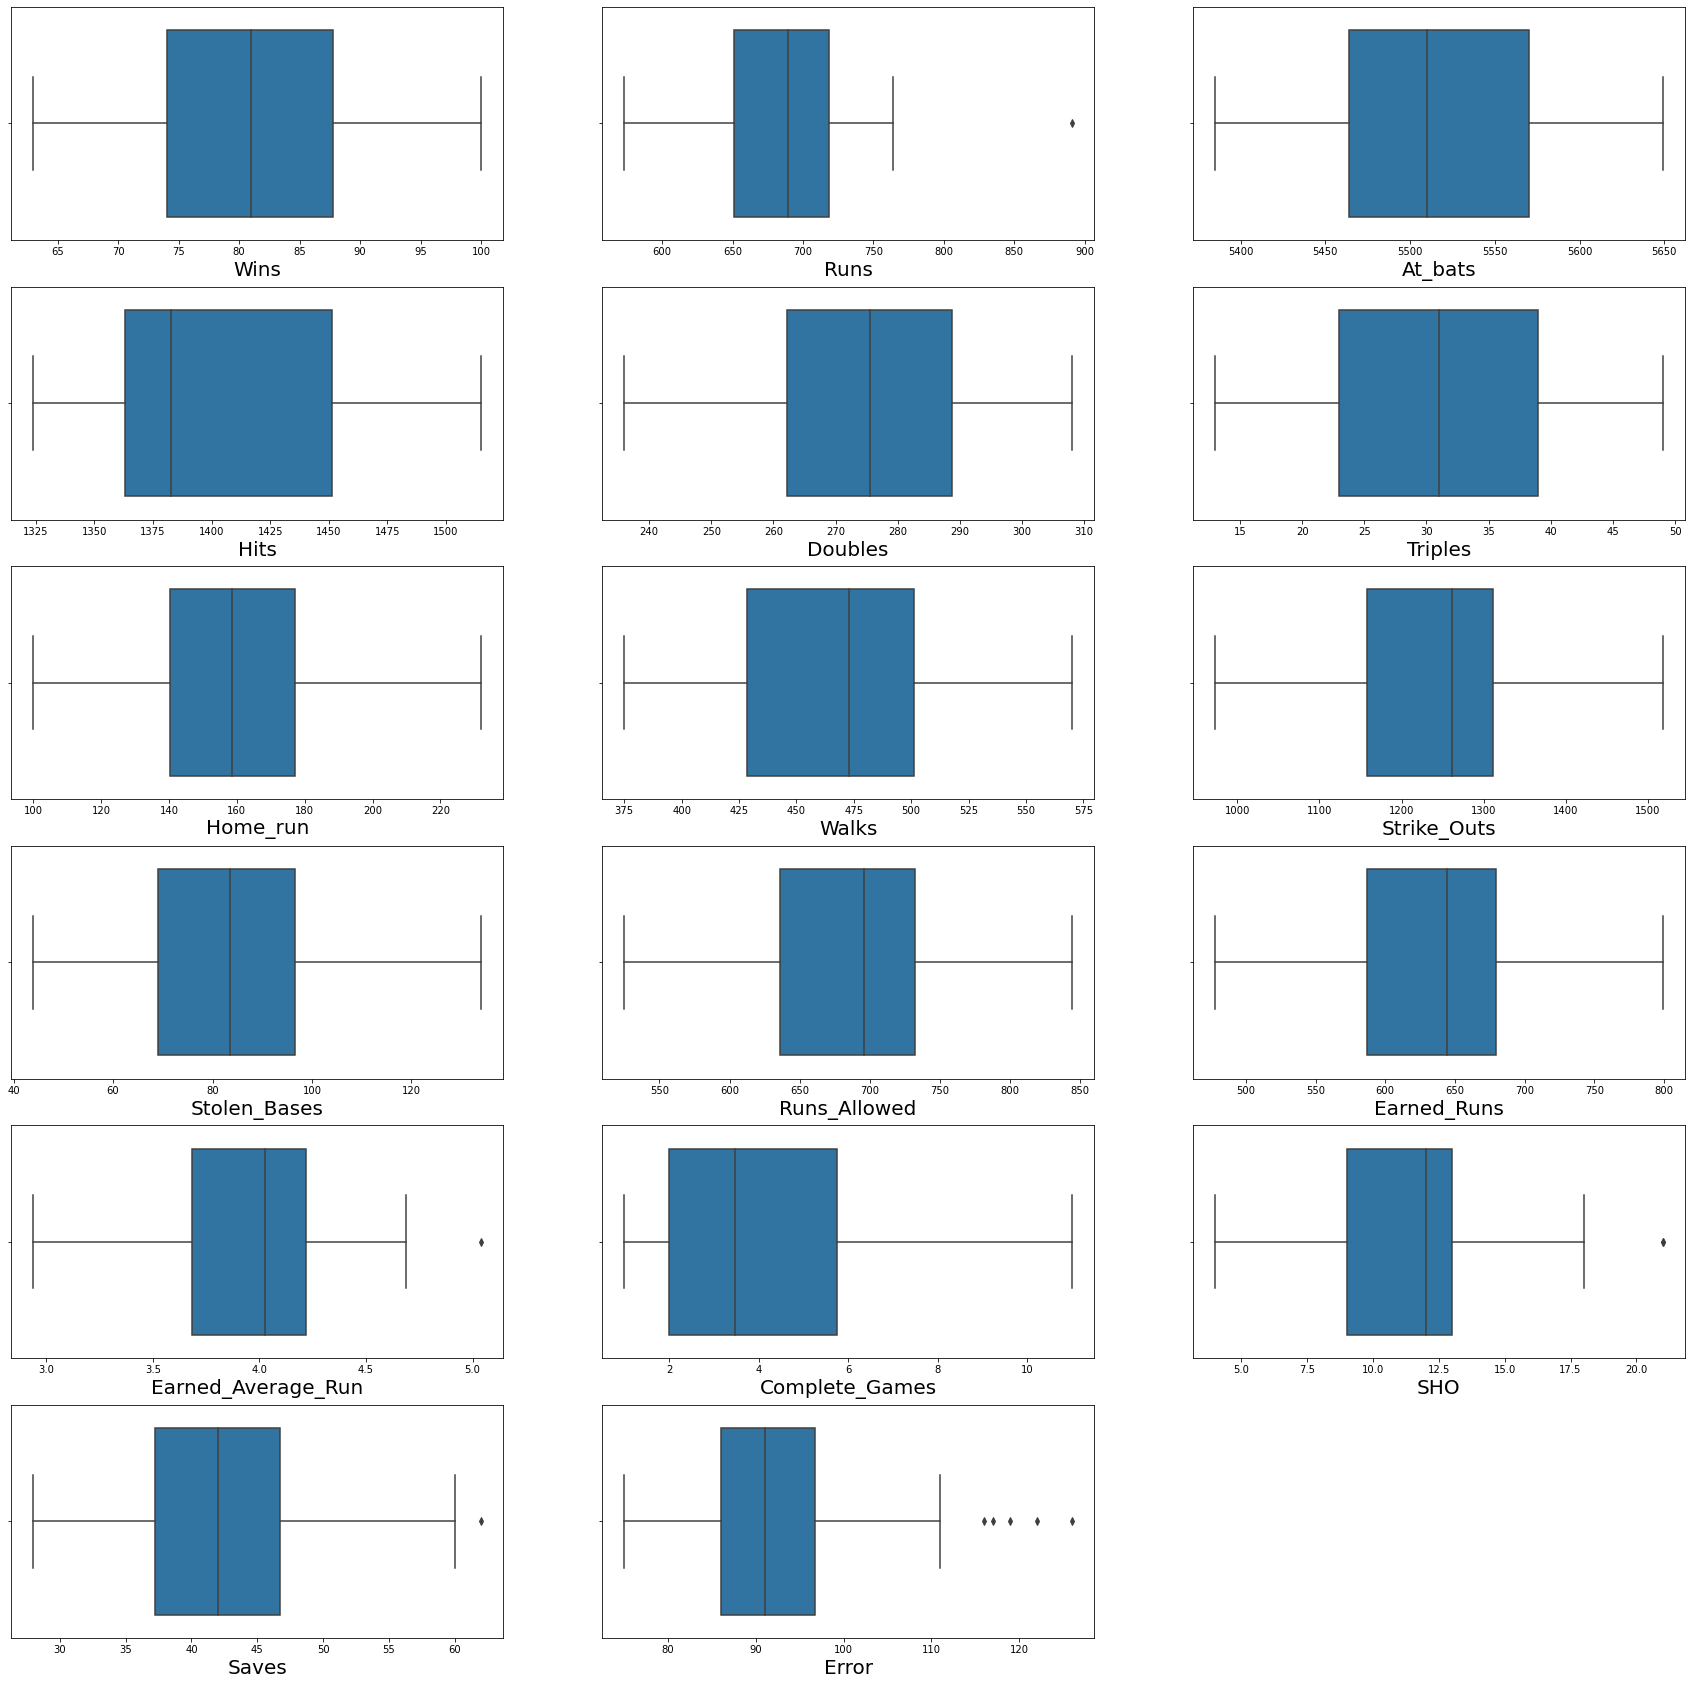

In [12]:
## plotting the boxplot for checking the outliers in the dataset
plt.figure(figsize = (30,30))
pl = 1

for column in df:
    if pl<=17:
        ax = plt.subplot(6,3,pl)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [13]:
##finding the outliers 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1
iqr

Wins                   13.7500
Runs                   67.0000
At_bats               106.0000
Hits                   88.5000
Doubles                26.5000
Triples                16.0000
Home_run               36.7500
Walks                  73.0000
Strike_Outs           154.0000
Stolen_Bases           27.5000
Runs_Allowed           96.2500
Earned_Runs            92.0000
Earned_Average_Run      0.5375
Complete_Games          3.7500
SHO                     4.0000
Saves                   9.5000
Error                  10.7500
dtype: float64

In [14]:
# Removing outliers in the Runs columns
runs = (q3.Runs + (1.5 * iqr.Runs))
runs
index = np.where(df['Runs']>runs)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5.000000,9,45,119


In [15]:
# Removing outliers in the Earned_Average_Run columns
ear = (q3.Earned_Average_Run + (1.5 * iqr.Earned_Average_Run))
ear
index = np.where(df['Earned_Average_Run']>ear)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5.000000,9,45,119


In [16]:
# Removing outliers in the SHO columns
sho = (q3.SHO + (1.5 * iqr.SHO))
sho
index = np.where(df['SHO']>sho)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5.000000,9,45,119


In [17]:
# Removing outliers in the Saves columns
saves = (q3.Saves + (1.5 * iqr.Saves))
saves

index = np.where(df['Saves']>saves)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5.000000,9,45,119


In [18]:
# Removing outliers in the Error columns
err = (q3.Error + (1.5 * iqr.Error))
err

index = np.where(df['Error']>err)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Average_Run,Complete_Games,SHO,Saves,Error
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.000000,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.000000,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.000000,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.000000,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.000000,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3.000000,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,3.466667,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1.000000,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3.000000,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5.000000,13,39,85


In [19]:
df.shape

(20, 17)

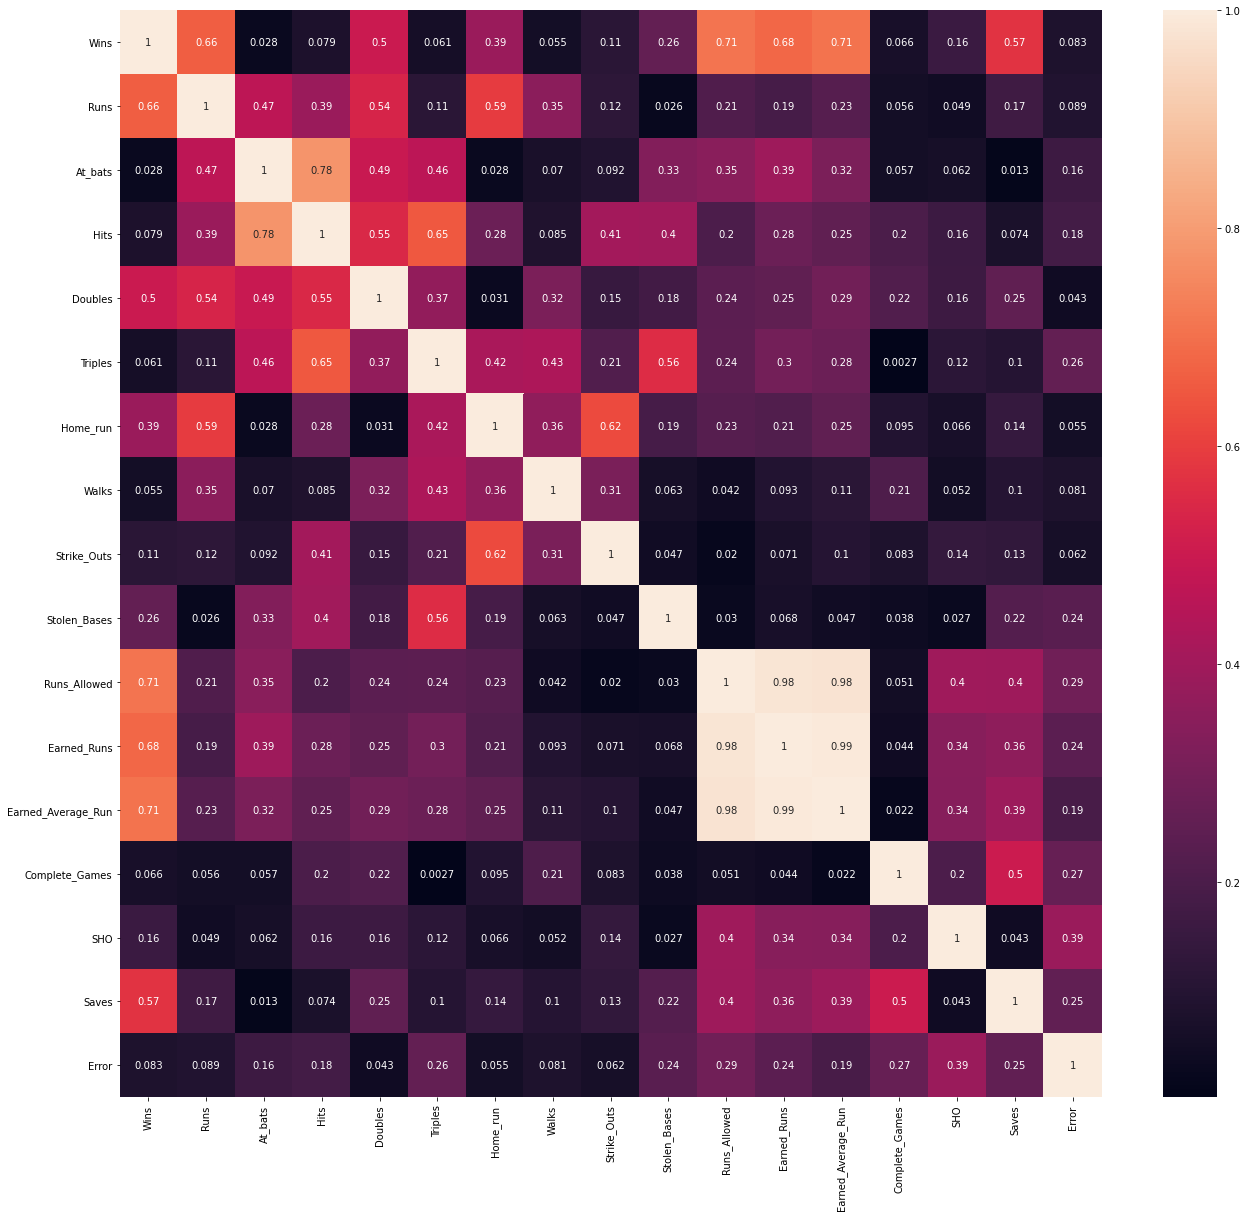

In [20]:
#finding the Co-relation between the columns using heatmap
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

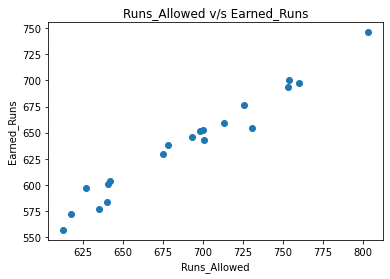

In [21]:
## plotting scatter plot to confirm co_relation between Runs_Allowed and Earned_Runs
plt.scatter(df.Runs_Allowed,df.Earned_Runs)
plt.xlabel('Runs_Allowed')
plt.ylabel('Earned_Runs')
plt.title('Runs_Allowed v/s Earned_Runs')
plt.show()

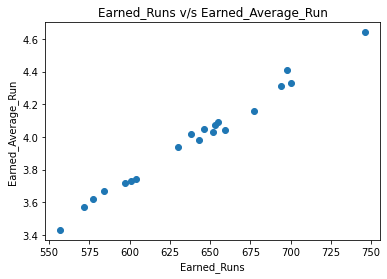

In [22]:
## plotting scatter plot to confirm co_relation between Earned_Runs and Earned_Average_Run
plt.scatter(df.Earned_Runs,df.Earned_Average_Run)
plt.xlabel('Earned_Runs')
plt.ylabel('Earned_Average_Run')
plt.title('Earned_Runs v/s Earned_Average_Run')
plt.show()

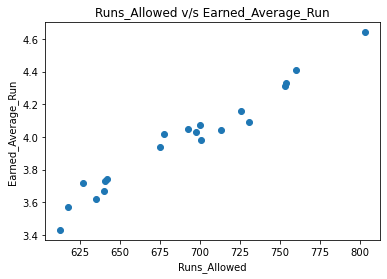

In [23]:
## plotting scatter plot to confirm co_relation between Runs_Allowed and Earned_Average_Run
plt.scatter(df.Runs_Allowed,df.Earned_Average_Run)
plt.xlabel('Runs_Allowed')
plt.ylabel('Earned_Average_Run')
plt.title('Runs_Allowed v/s Earned_Average_Run')
plt.show()

In [24]:
##Dropping the columns which has has high co_relation between each other
# splitting the features and labels into x and y
x = df.drop(columns = ['Wins','Earned_Runs','Earned_Average_Run'])
y = df['Wins']

In [25]:
x

,Runs,At_bats,Hits,Doubles,Triples,Home_run,Walks,Strike_Outs,Stolen_Bases,Runs_Allowed,Complete_Games,SHO,Saves,Error
0,724,5575,1497,300,42,139,383,973,104,641,2.000000,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2.000000,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11.000000,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7.000000,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7.000000,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,3.000000,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,3.466667,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,1.000000,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,3.000000,10,40,97
11,729,5459,1363,278,26,230,486,1392,121,618,5.000000,13,39,85


In [26]:
y

0     95
1     83
2     81
3     76
4     74
6     87
7     81
8     80
9     78
11    86
12    85
13    76
19    64
20    90
21    83
22    71
23    67
26    84
27    79
28    74
Name: Wins, dtype: int64

In [27]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [28]:
#splitting the dataset into train and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.30,random_state = 34)

In [29]:
## using LinearRegression Algirithm for regression problem
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
#Checking the score of linearRegression for training data
lr.score(x_train,y_train)

1.0

In [31]:
# Checking the score of LinearRegression for Testing data
lr.score(x_test,y_test)

0.4697788239473677

In [32]:
#Predicting the values using LnearRegression
y_pred = lr.predict(x_test)
y_pred

array([78.33476376, 88.9983481 , 75.62069947, 76.40216179, 94.80672436,
       66.0859144 ])

In [33]:
#Checking the MeanAbsolute Error
mean_absolute_error(y_test,y_pred)

5.44316846507251

In [34]:
#Checking the Mean Squared Error
mean_squared_error(y_test,y_pred)

53.86163446734656

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.339048607779251

In [36]:
#Applyiing Lasso 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [37]:
alpha = lacv.alpha_
alpha

0.30569007932534237

In [39]:
#Applying Ridge 
las_reg = Lasso(alpha)
las_reg.fit(x_train,y_train)

Lasso(alpha=0.30569007932534237)

In [40]:
las_reg.score(x_test,y_test)

0.8218940392489322

In [41]:
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [42]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [43]:
rd.score(x_test,y_test)

0.5950386207977902

In [44]:
#Applying another algorithm for regression KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [45]:
knn.score(x_train,y_train)

0.3922722481553985

In [46]:
knn.score(x_test,y_test)

0.2601804757998354

In [47]:
y_pred = knn.predict(x_test)
y_pred

array([78.4, 80.6, 76.8, 82.6, 79.6, 76.8])